In [1]:
# 필요한 패키지 설치
!pip install plotly
!pip install pywaffle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle
plt.rcParams['figure.dpi'] = 300


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fivethirtyeight/uber-pickups-in-new-york-city")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\fivethirtyeight\uber-pickups-in-new-york-city\versions\2


In [3]:
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/fivethirtyeight/uber-pickups-in-new-york-city/versions/2/uber-raw-data-sep14.csv")

# 데이터 샘플 확인
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
# Date/Time 컬럼을 datetime 형식으로 변환
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# 날짜와 시간을 각각 분리하여 새로운 컬럼 생성
df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time

# 결과 확인
df = df.drop('Date/Time', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Lat     1028136 non-null  float64
 1   Lon     1028136 non-null  float64
 2   Base    1028136 non-null  object 
 3   Date    1028136 non-null  object 
 4   Time    1028136 non-null  object 
dtypes: float64(2), object(3)
memory usage: 39.2+ MB


In [6]:
# Date 컬럼을 object -> datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# Time 컬럼을 object -> datetime 형식으로 변환
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Lat     1028136 non-null  float64       
 1   Lon     1028136 non-null  float64       
 2   Base    1028136 non-null  object        
 3   Date    1028136 non-null  datetime64[ns]
 4   Time    1028136 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 39.2+ MB


In [8]:
# 각 컬럼의 속성 및 결측치 확인
df.info()
# 각 컬럼의 통계치 확인
df.describe()
# 각 컬럼의 왜도 확인
df.skew(numeric_only  = True)
# 각 컬럼의 첨도 확인
df.kurtosis(numeric_only = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Lat     1028136 non-null  float64       
 1   Lon     1028136 non-null  float64       
 2   Base    1028136 non-null  object        
 3   Date    1028136 non-null  datetime64[ns]
 4   Time    1028136 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 39.2+ MB


Lat    10.180041
Lon    27.924359
dtype: float64

In [9]:
# hour, day_of_week 컬럼 생성
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S') # Time 컬럼을 datetime 형식으로 변환
df['hour'] = df['Time'].dt.hour               # Time 컬럼에서 시 추출
df['day_of_week'] = df['Date'].dt.day_name() # 요일을 영어로 변환

In [10]:
df.head()

,Lat,Lon,Base,Date,Time,hour,day_of_week
0,40.2201,-74.0021,B02512,2014-09-01,1900-01-01 00:01:00,0,Monday
1,40.7500,-74.0027,B02512,2014-09-01,1900-01-01 00:01:00,0,Monday
2,40.7559,-73.9864,B02512,2014-09-01,1900-01-01 00:03:00,0,Monday
3,40.7450,-73.9889,B02512,2014-09-01,1900-01-01 00:06:00,0,Monday
4,40.8145,-73.9444,B02512,2014-09-01,1900-01-01 00:11:00,0,Monday


시각화 실습 

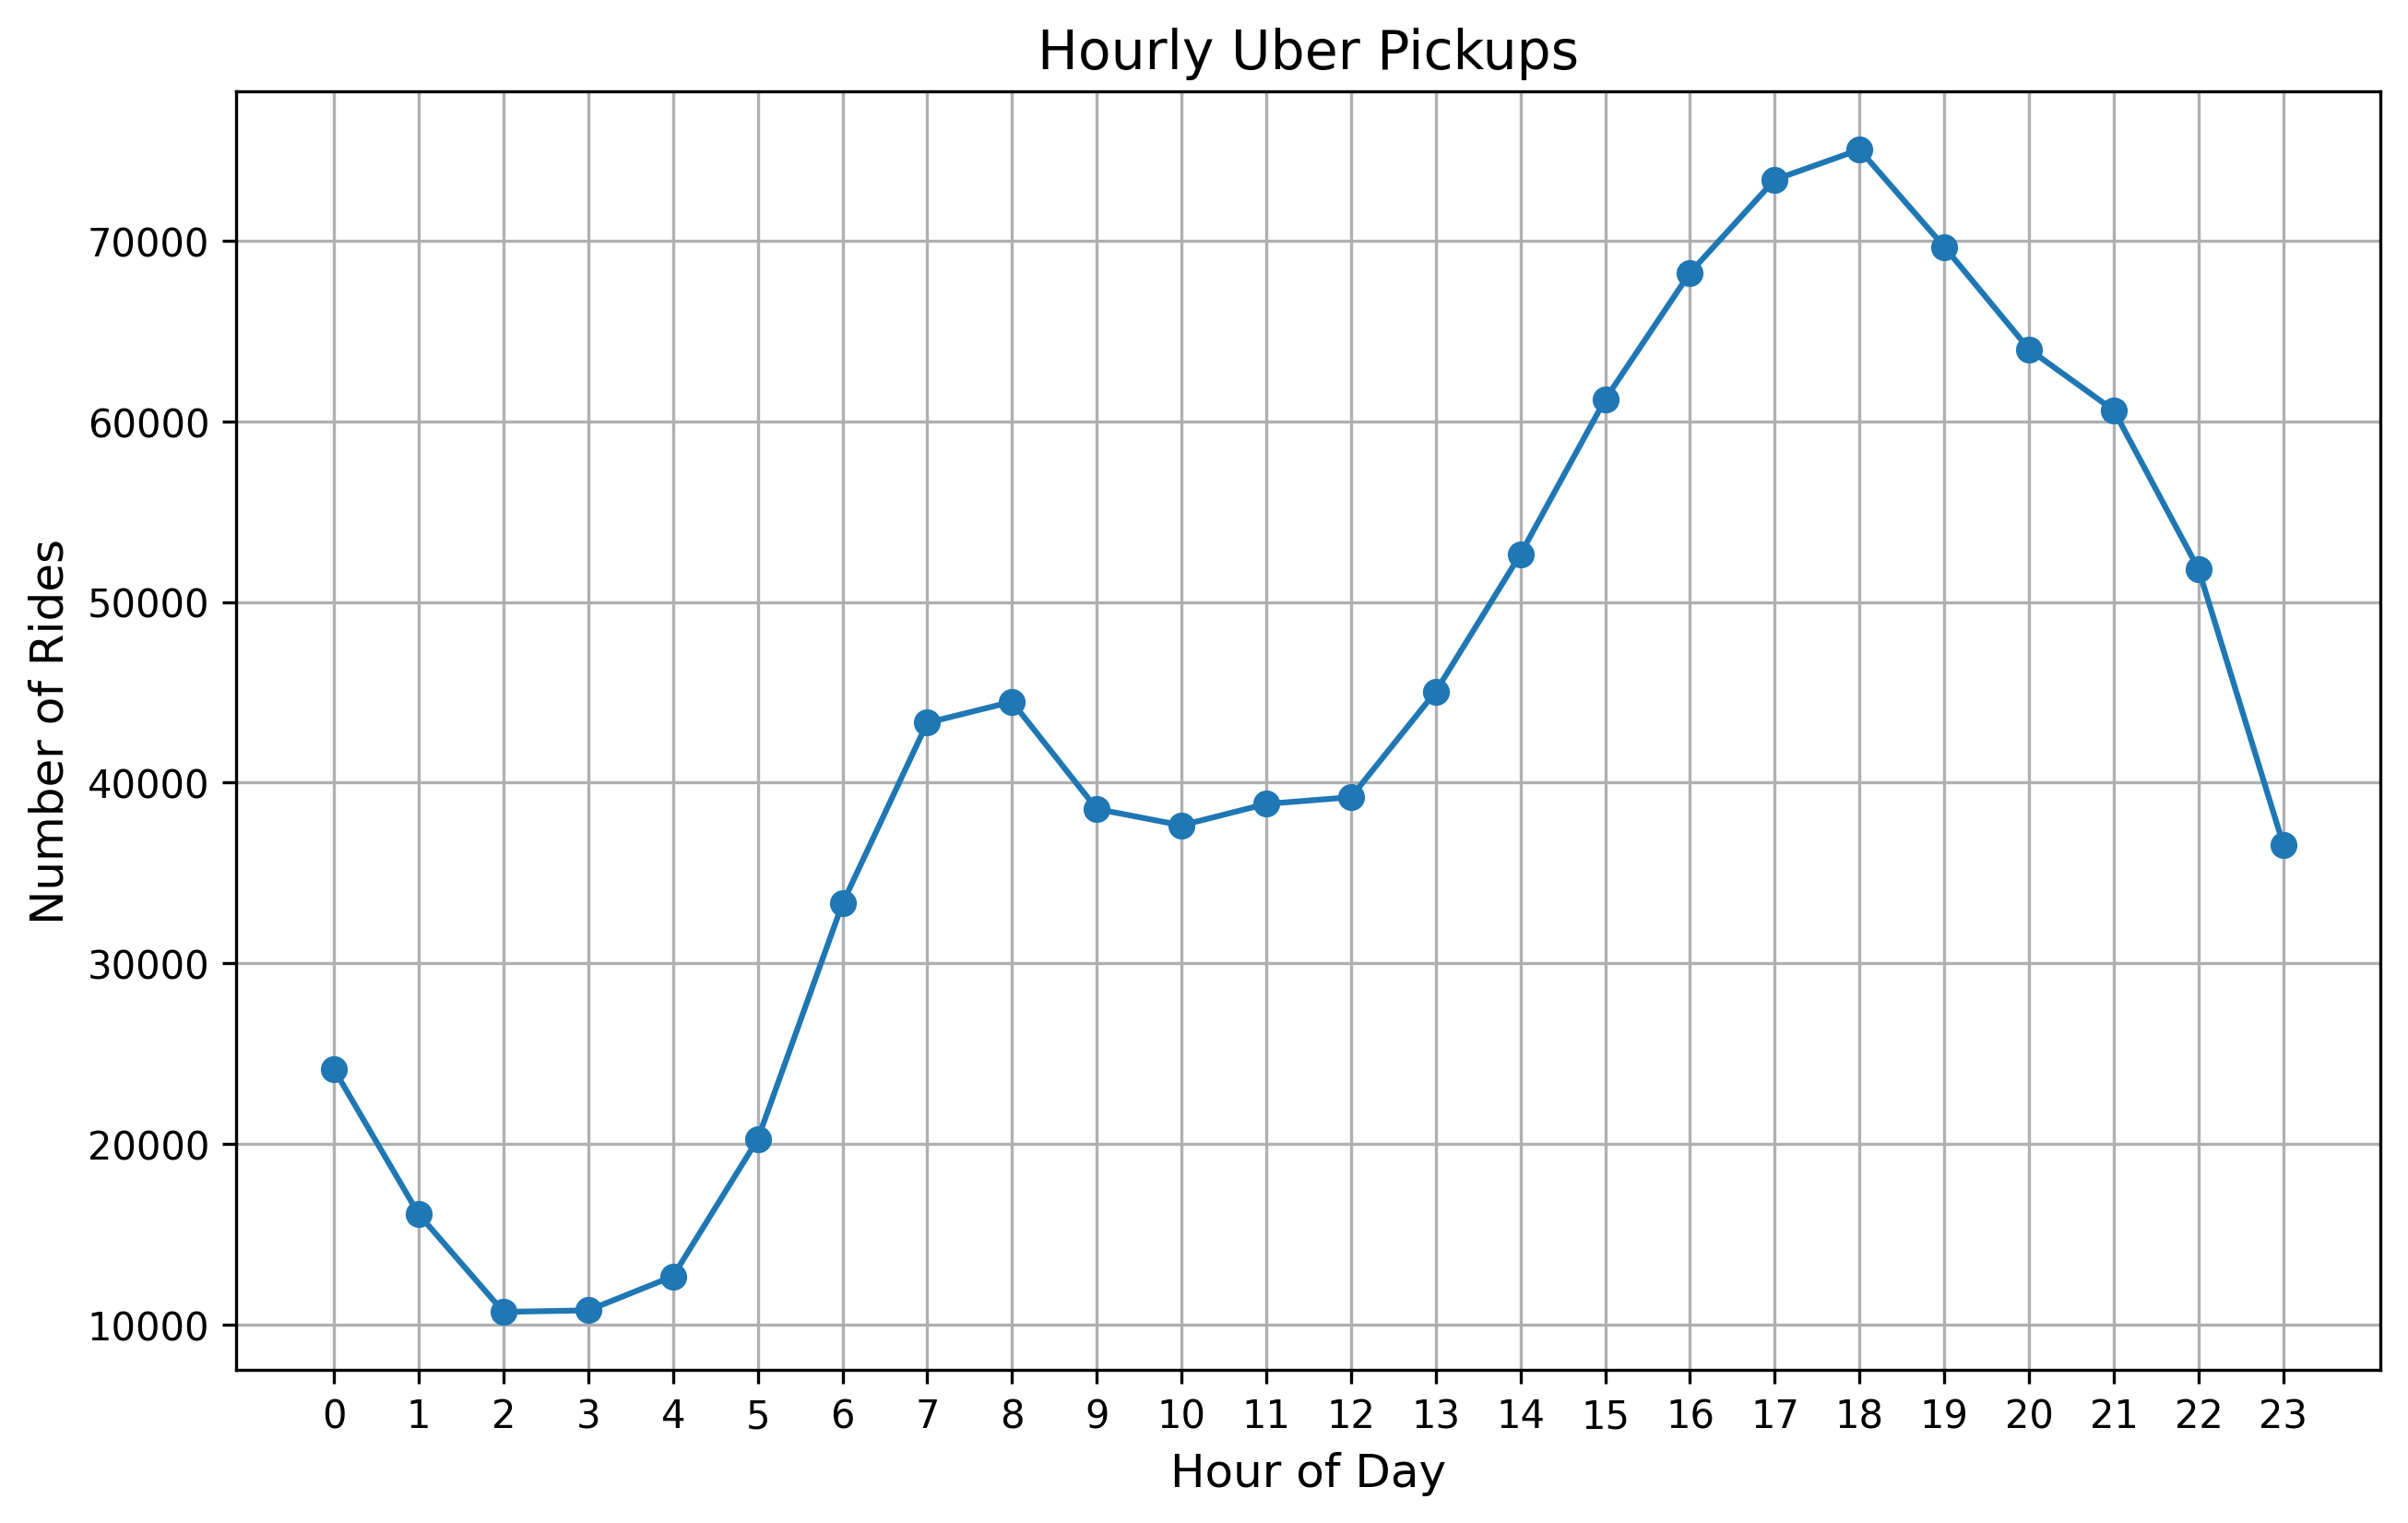

In [11]:
# 시간대별 탑승 수 추이

# 시간대별 탑승 수 집계
hourly_rides = df.groupby('hour').size() # hour을 기준으로 그룹화하여 사이즈 계산, 개수를 세는 것


plt.figure(figsize=(10, 6))
hourly_rides.plot(kind='line', marker='o')
plt.title('Hourly Uber Pickups', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

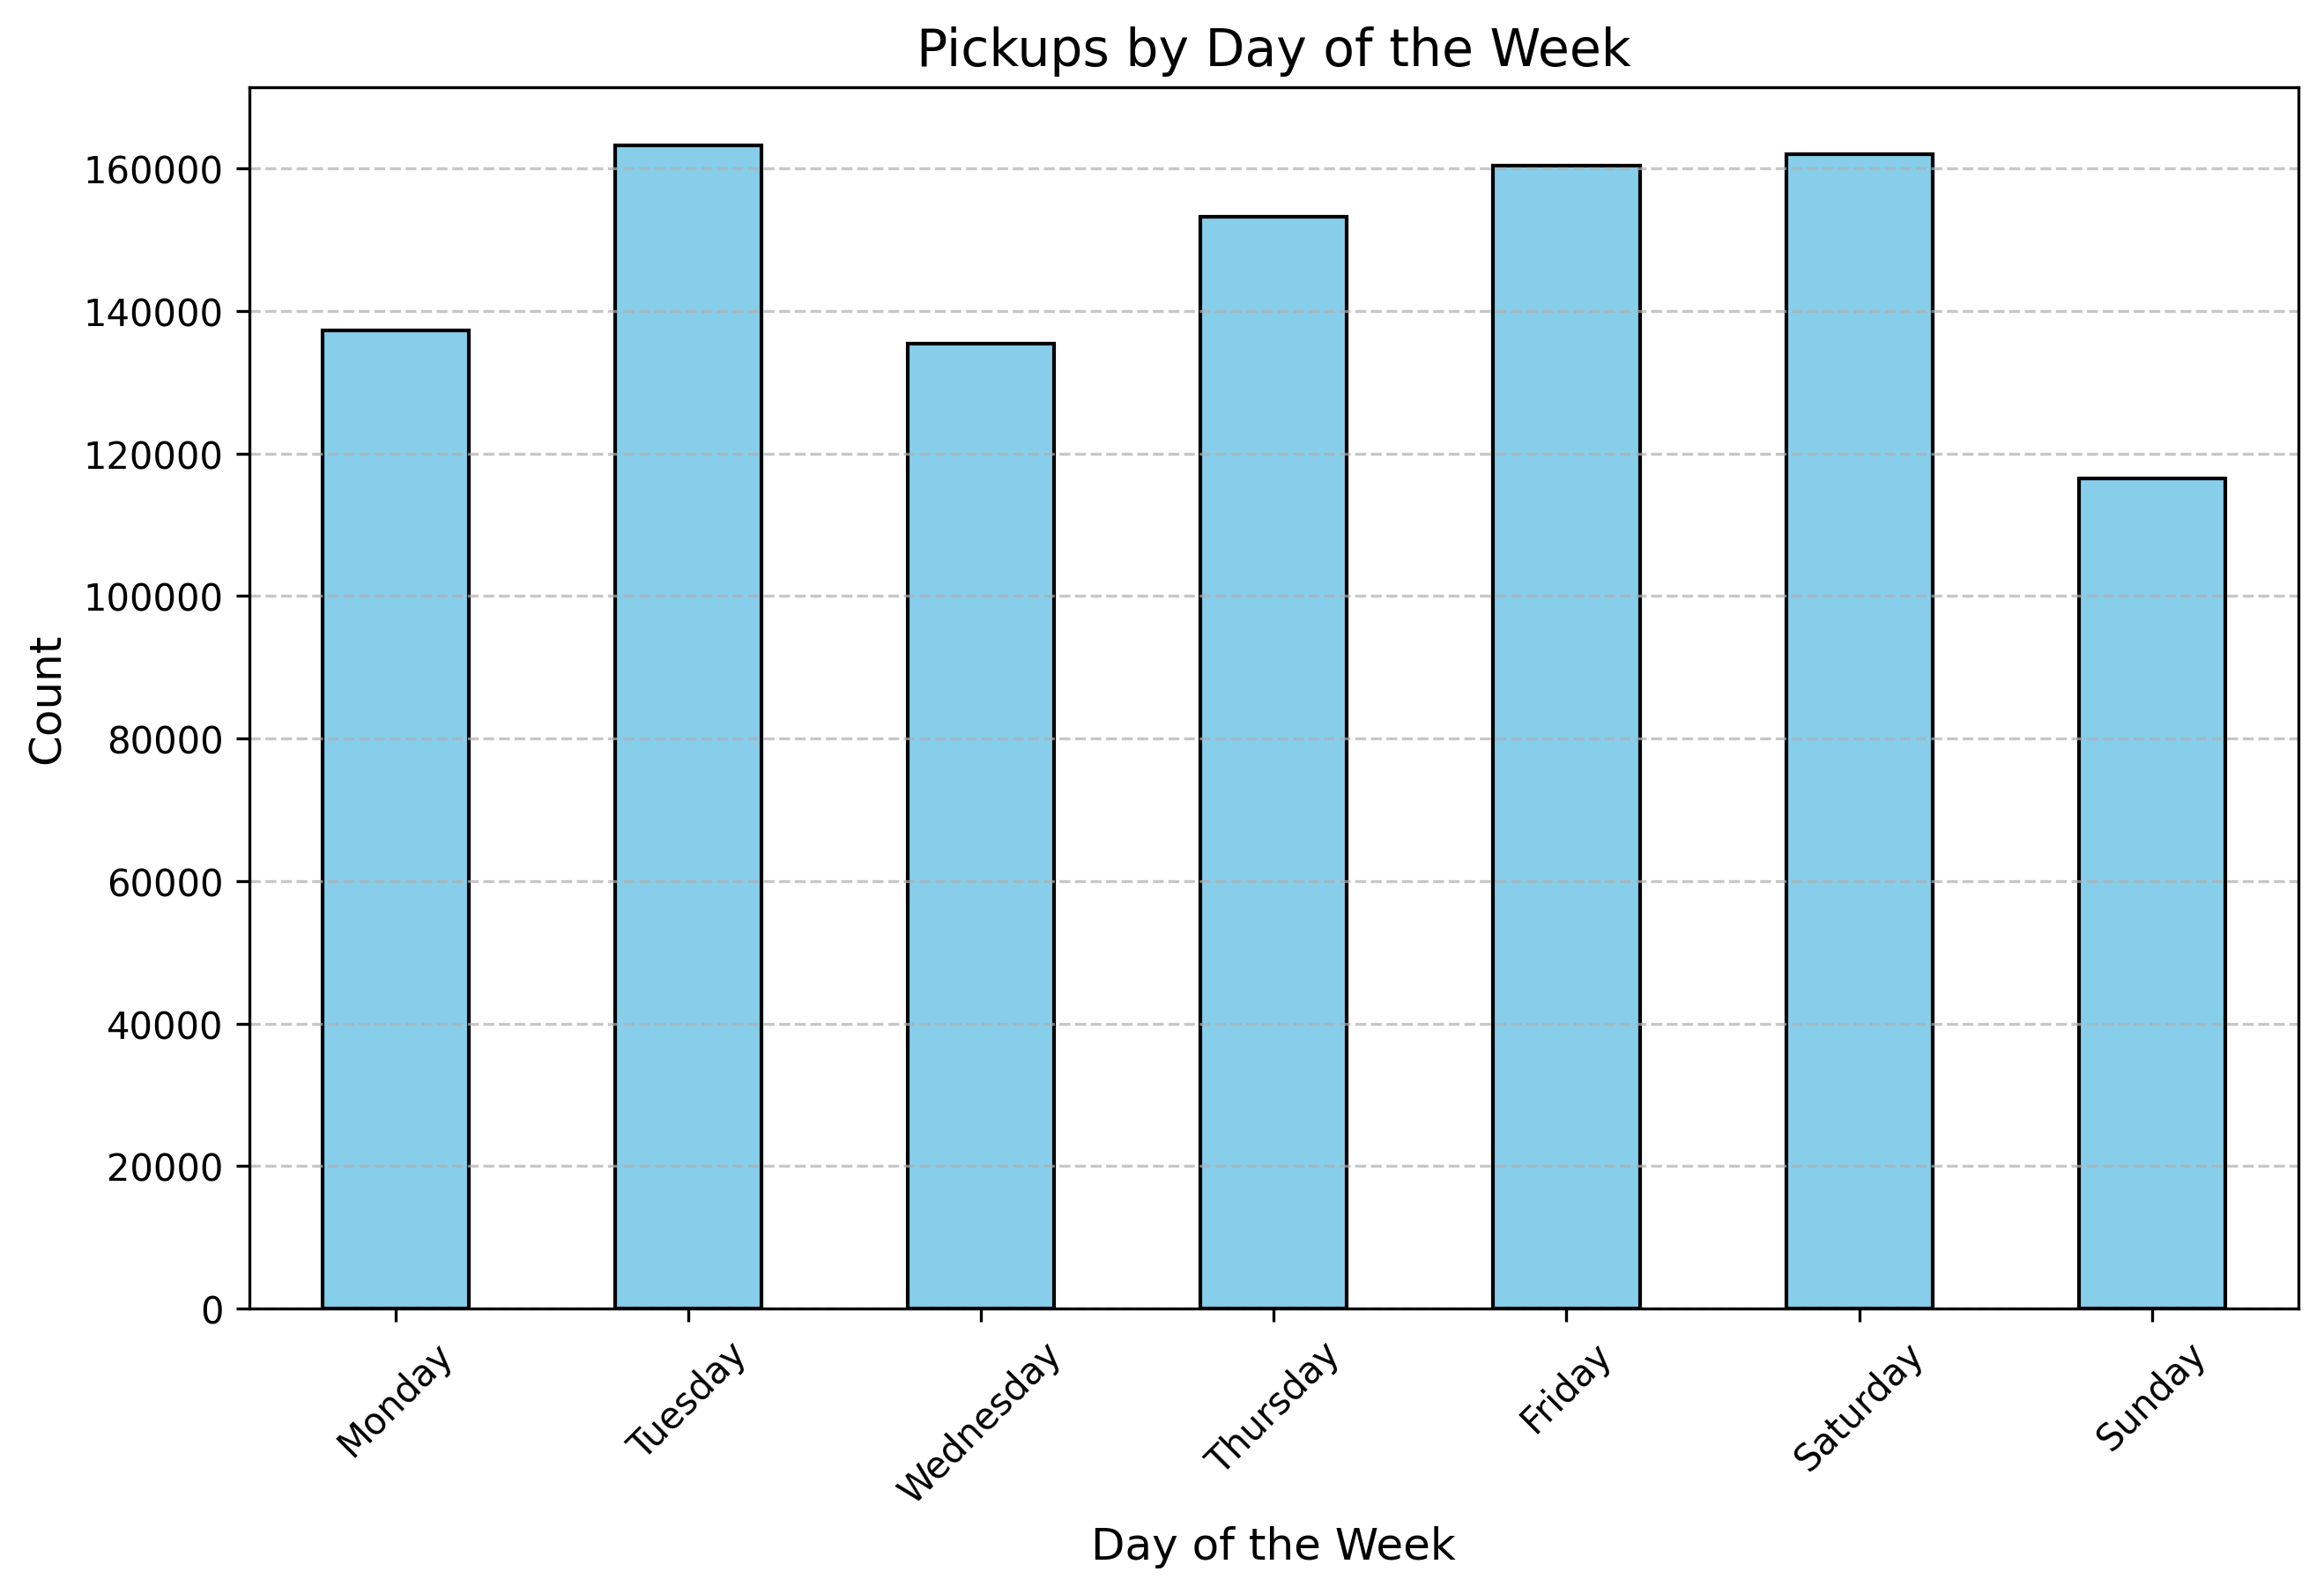

In [12]:
# 요일별 탑승 수 집계
rides_by_day = df['day_of_week'].value_counts()

# 요일 순서 정렬
rides_by_day = rides_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
rides_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Pickups by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

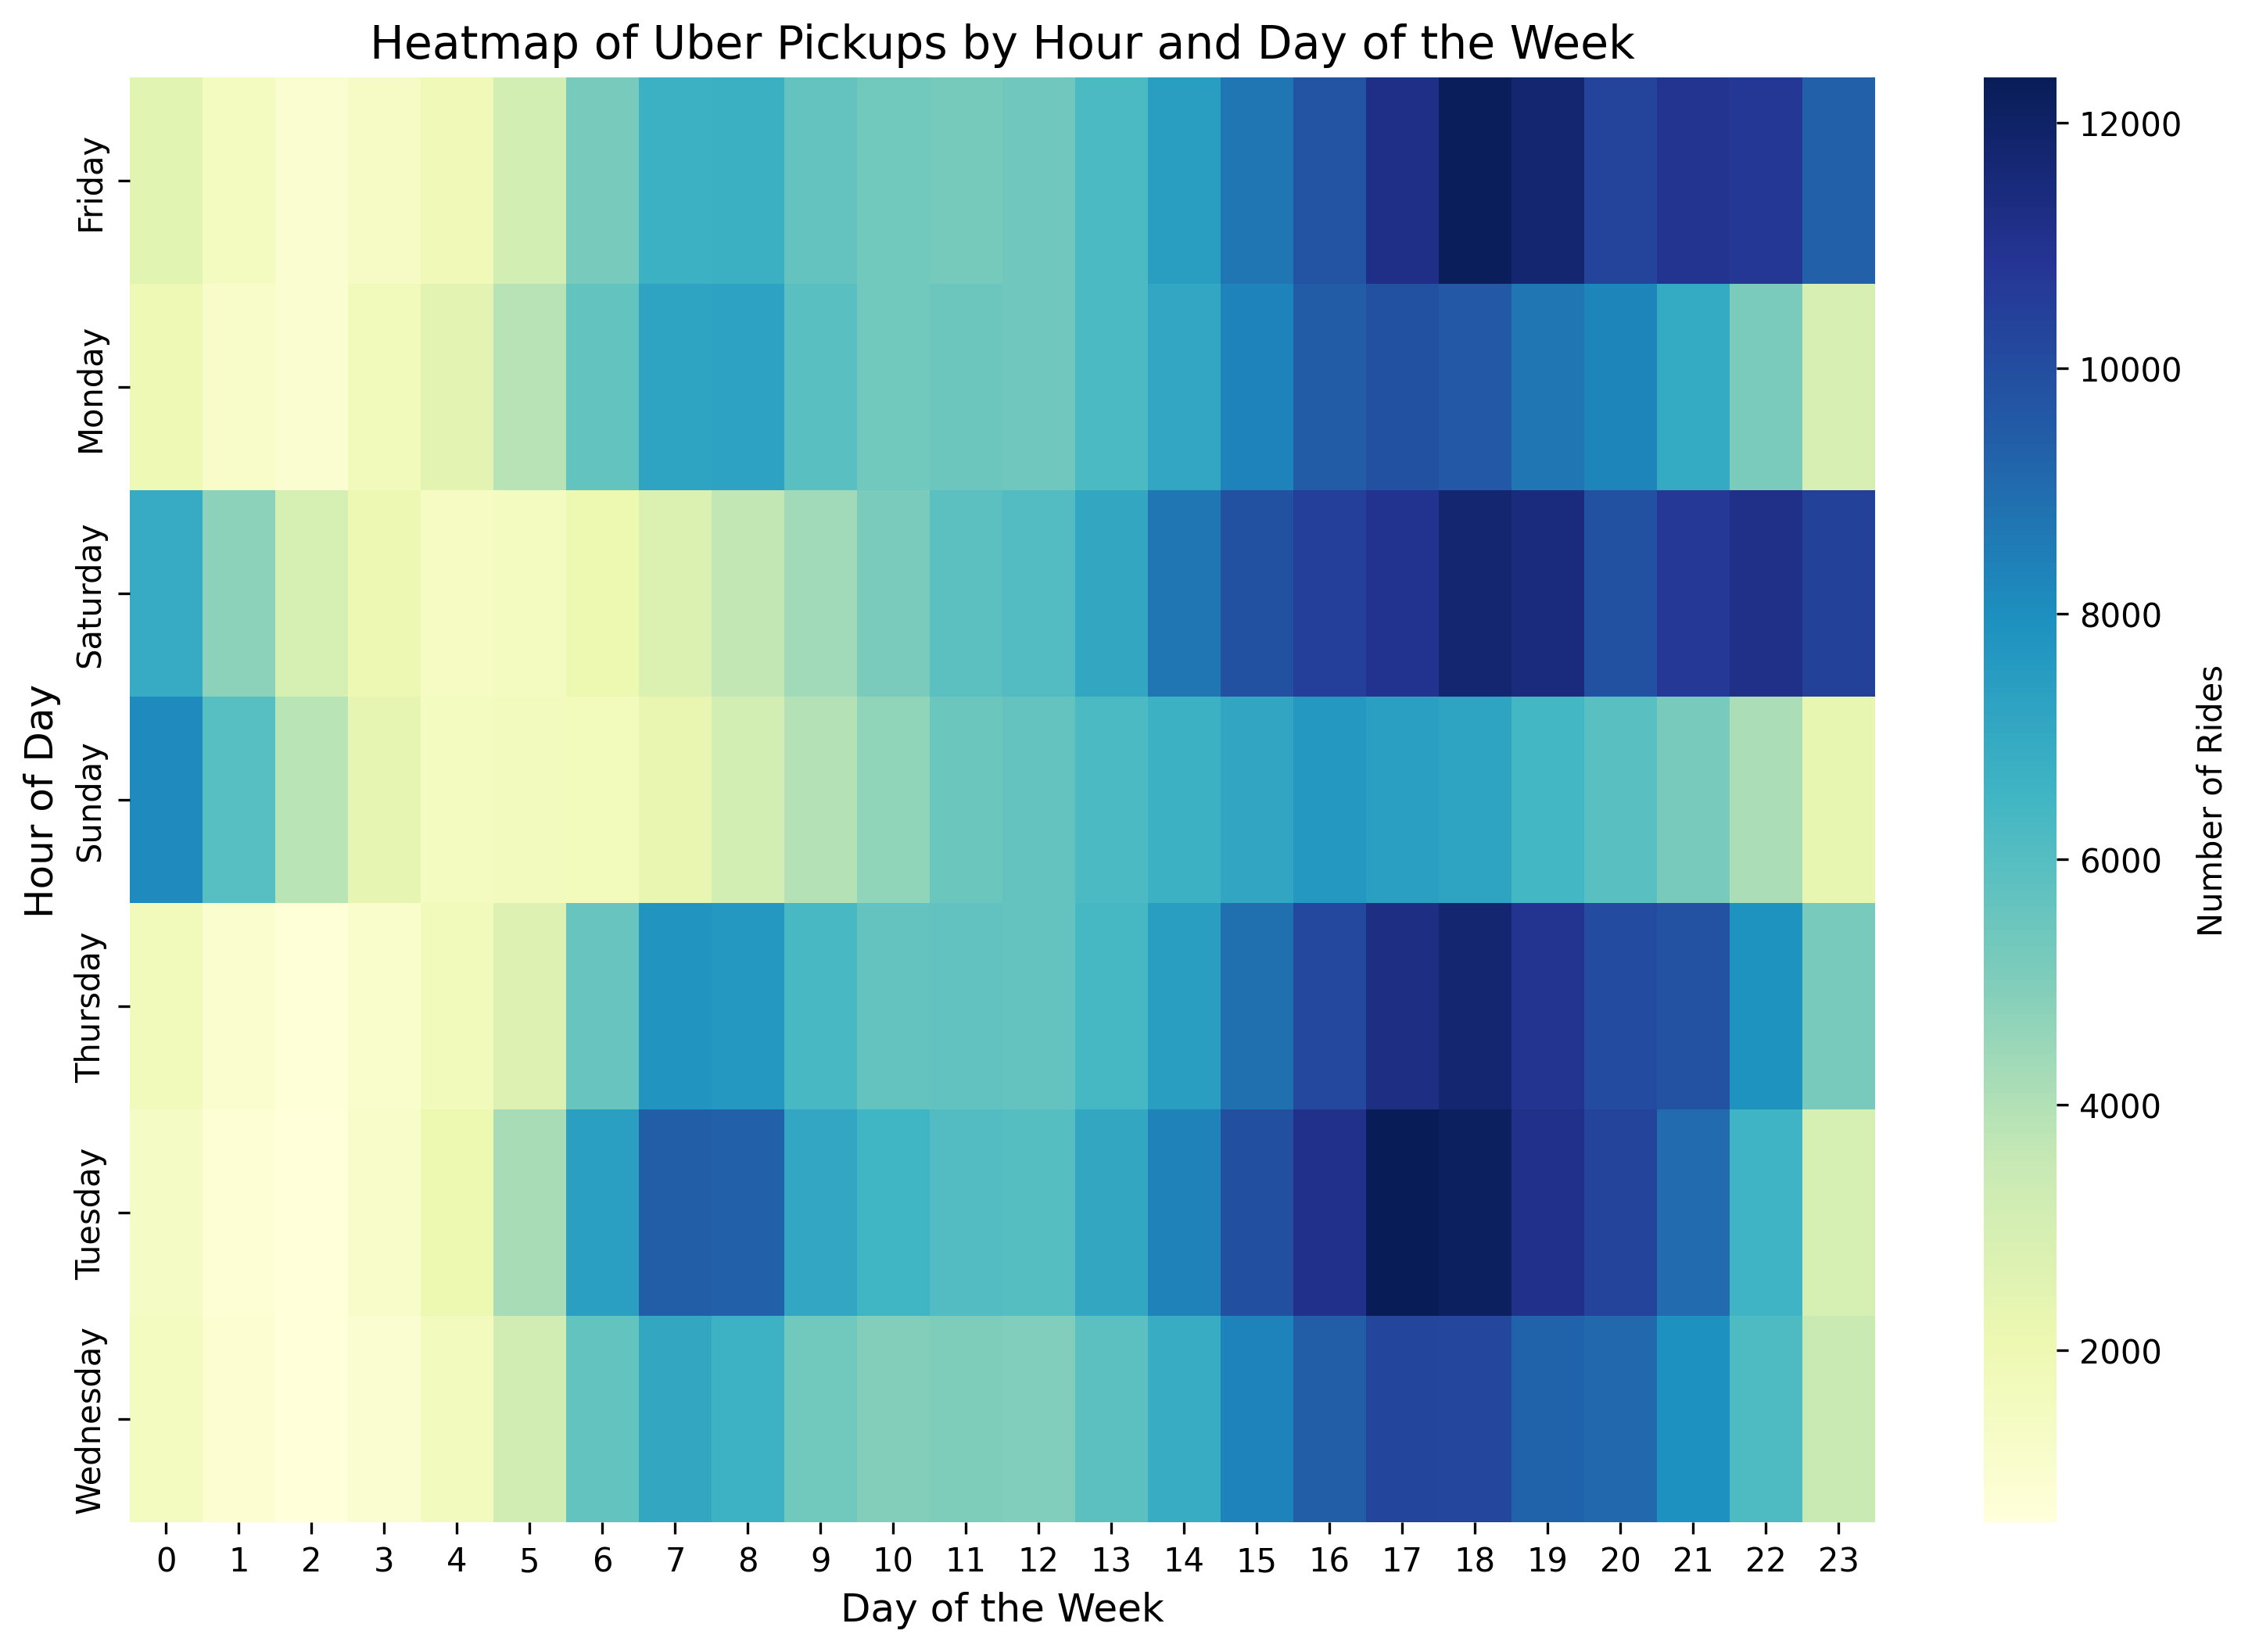

In [13]:
# hour와 day_of_week 컬럼을 기준으로 탑승 수 집계 
# 시간대별, 요일별 탑승 수 집계 예) 월요일 0시, 월요일 1시, ..., 일요일 23시
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='d', cbar_kws={'label': 'Number of Rides'})
plt.title('Heatmap of Uber Pickups by Hour and Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.show()

In [14]:
rides_by_day

day_of_week
Monday       137288
Tuesday      163230
Wednesday    135373
Thursday     153276
Friday       160380
Saturday     162057
Sunday       116532
Name: count, dtype: int64

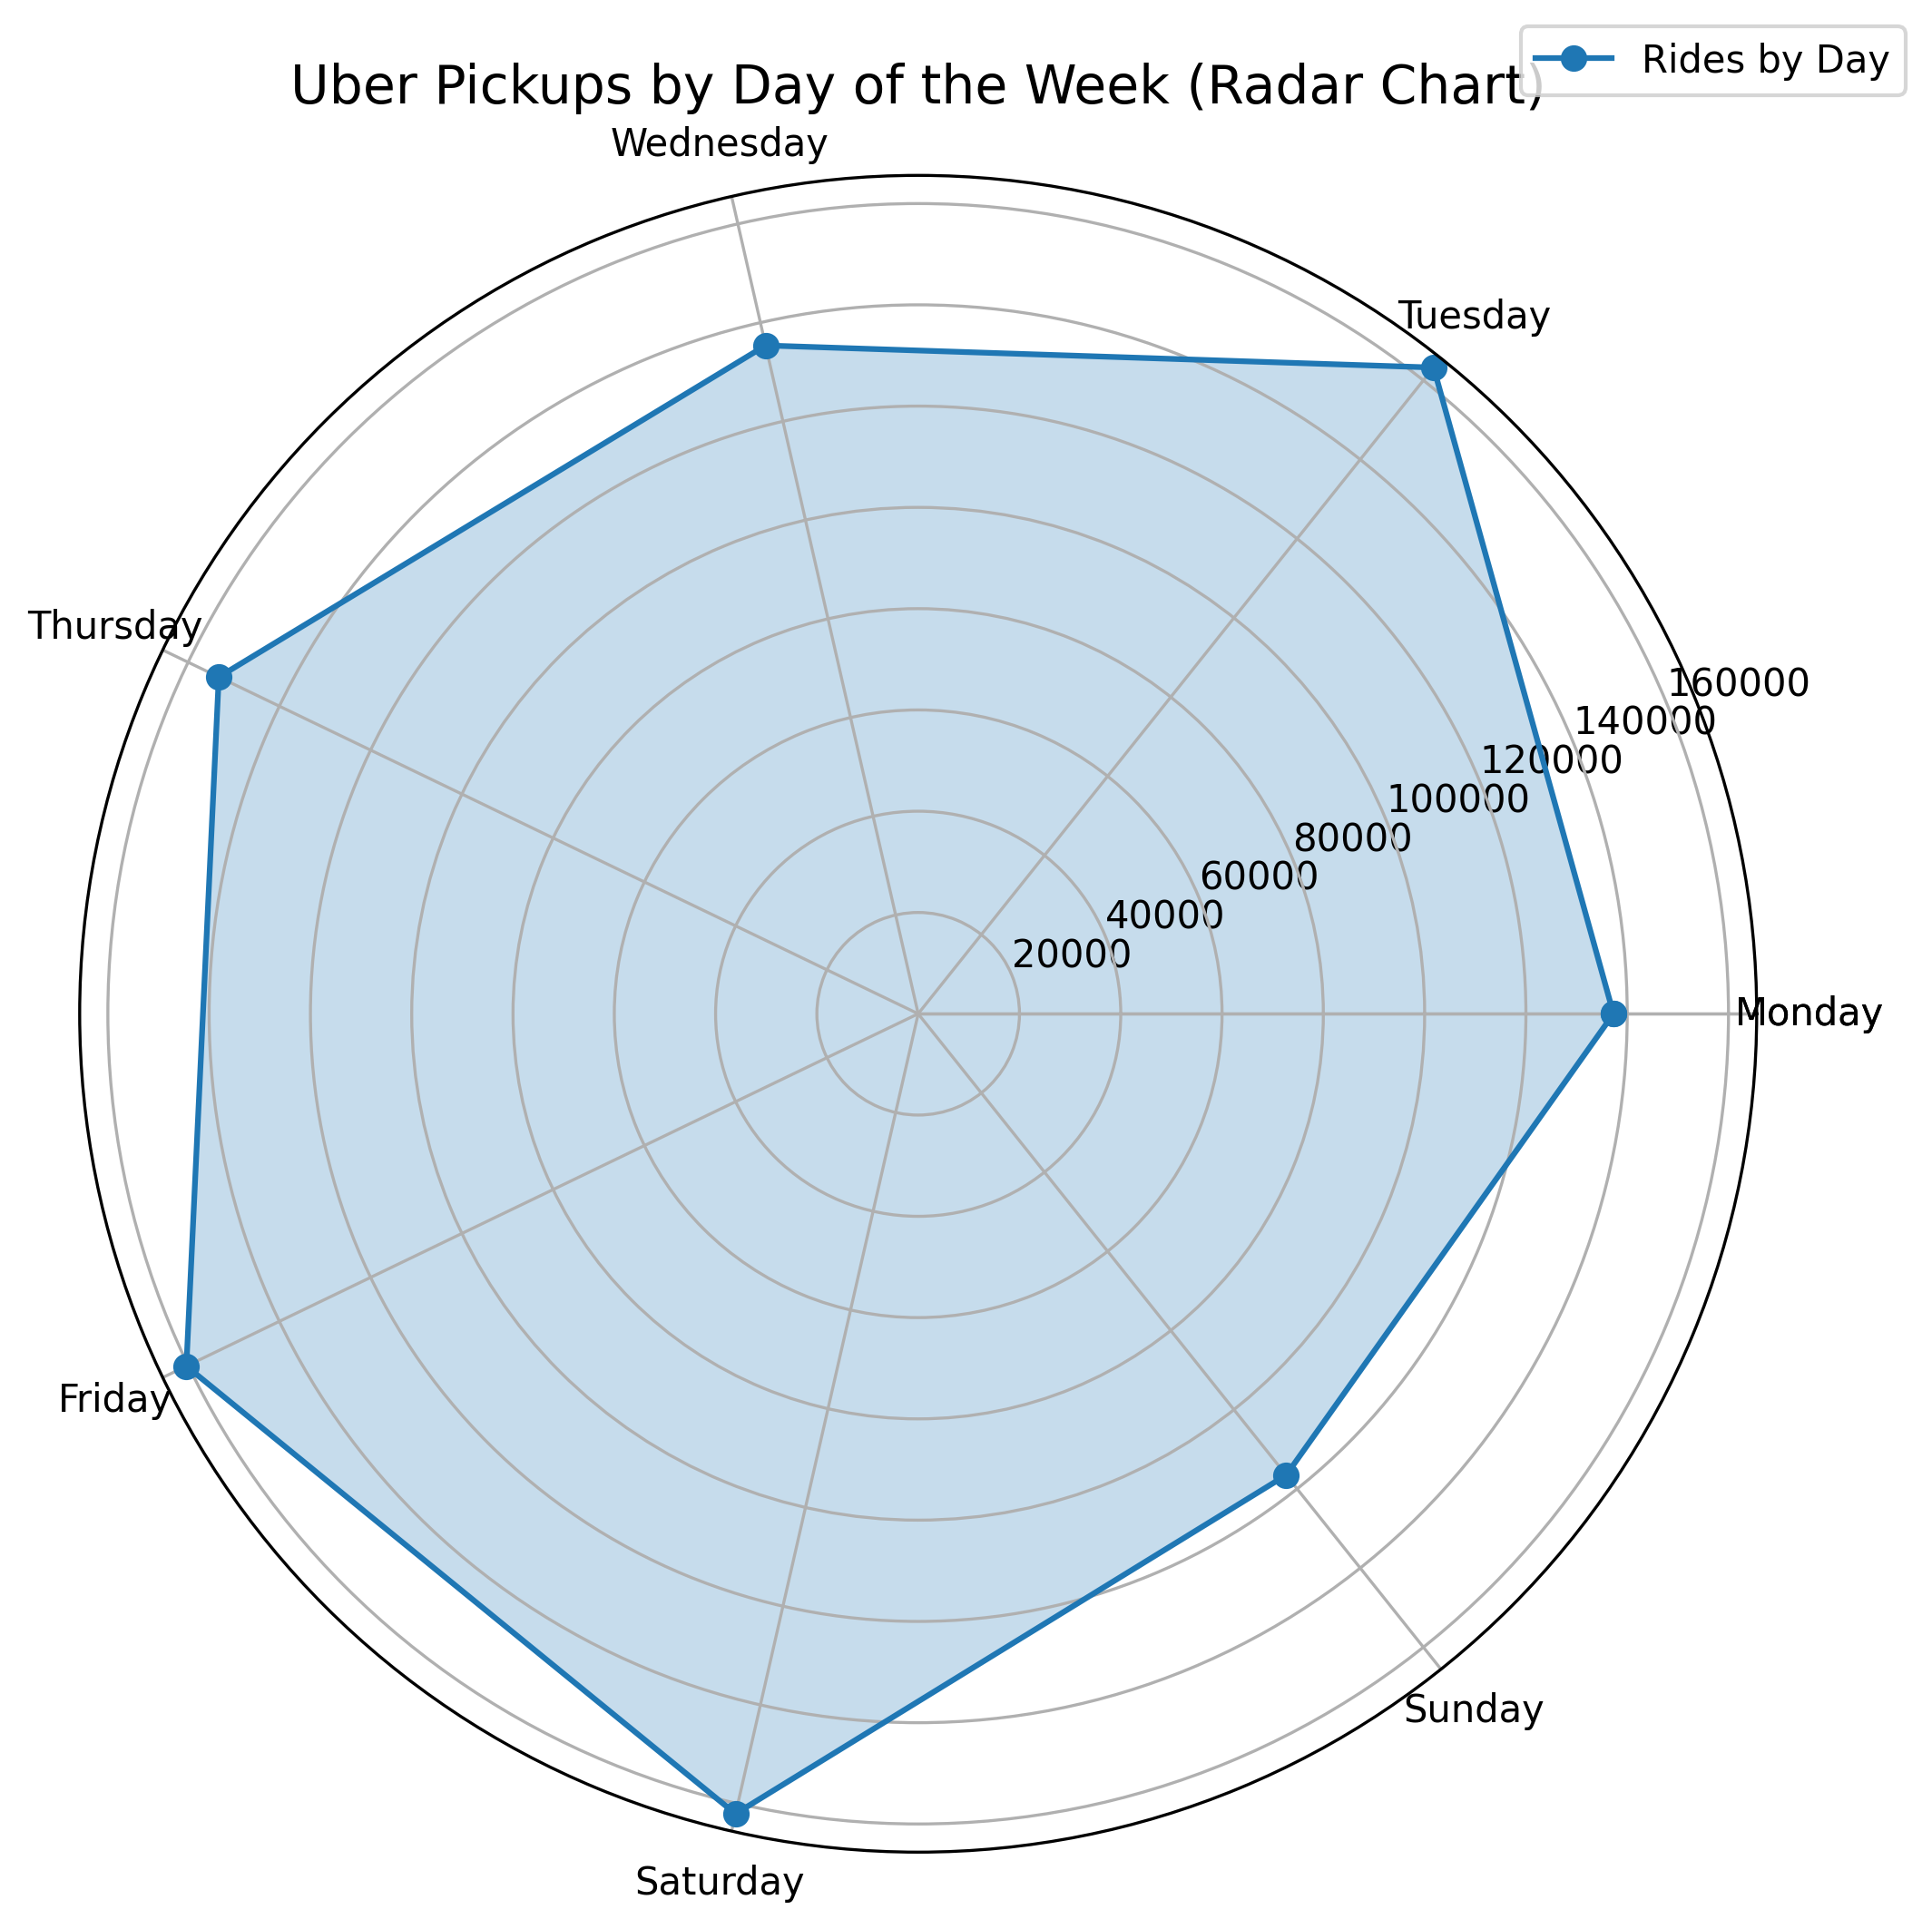

In [15]:
# 요일별 탑승 수 방사형 차트
categories = rides_by_day.index # 요일 이름
values = rides_by_day.values    # 요일별 탑승 수

# 카테고리를 닫아 방사형 차트를 완성형으로 만듦
categories = list(categories) + [categories[0]]
values = list(values) + [values[0]]

# 각 카테고리에 대한 각도 계산
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=True)

# 방사형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.plot(angles, values, marker='o', label='Rides by Day')
ax.fill(angles, values, alpha=0.25)

# 카테고리 레이블 설정
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# 제목 및 범례 추가
plt.title('Uber Pickups by Day of the Week (Radar Chart)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

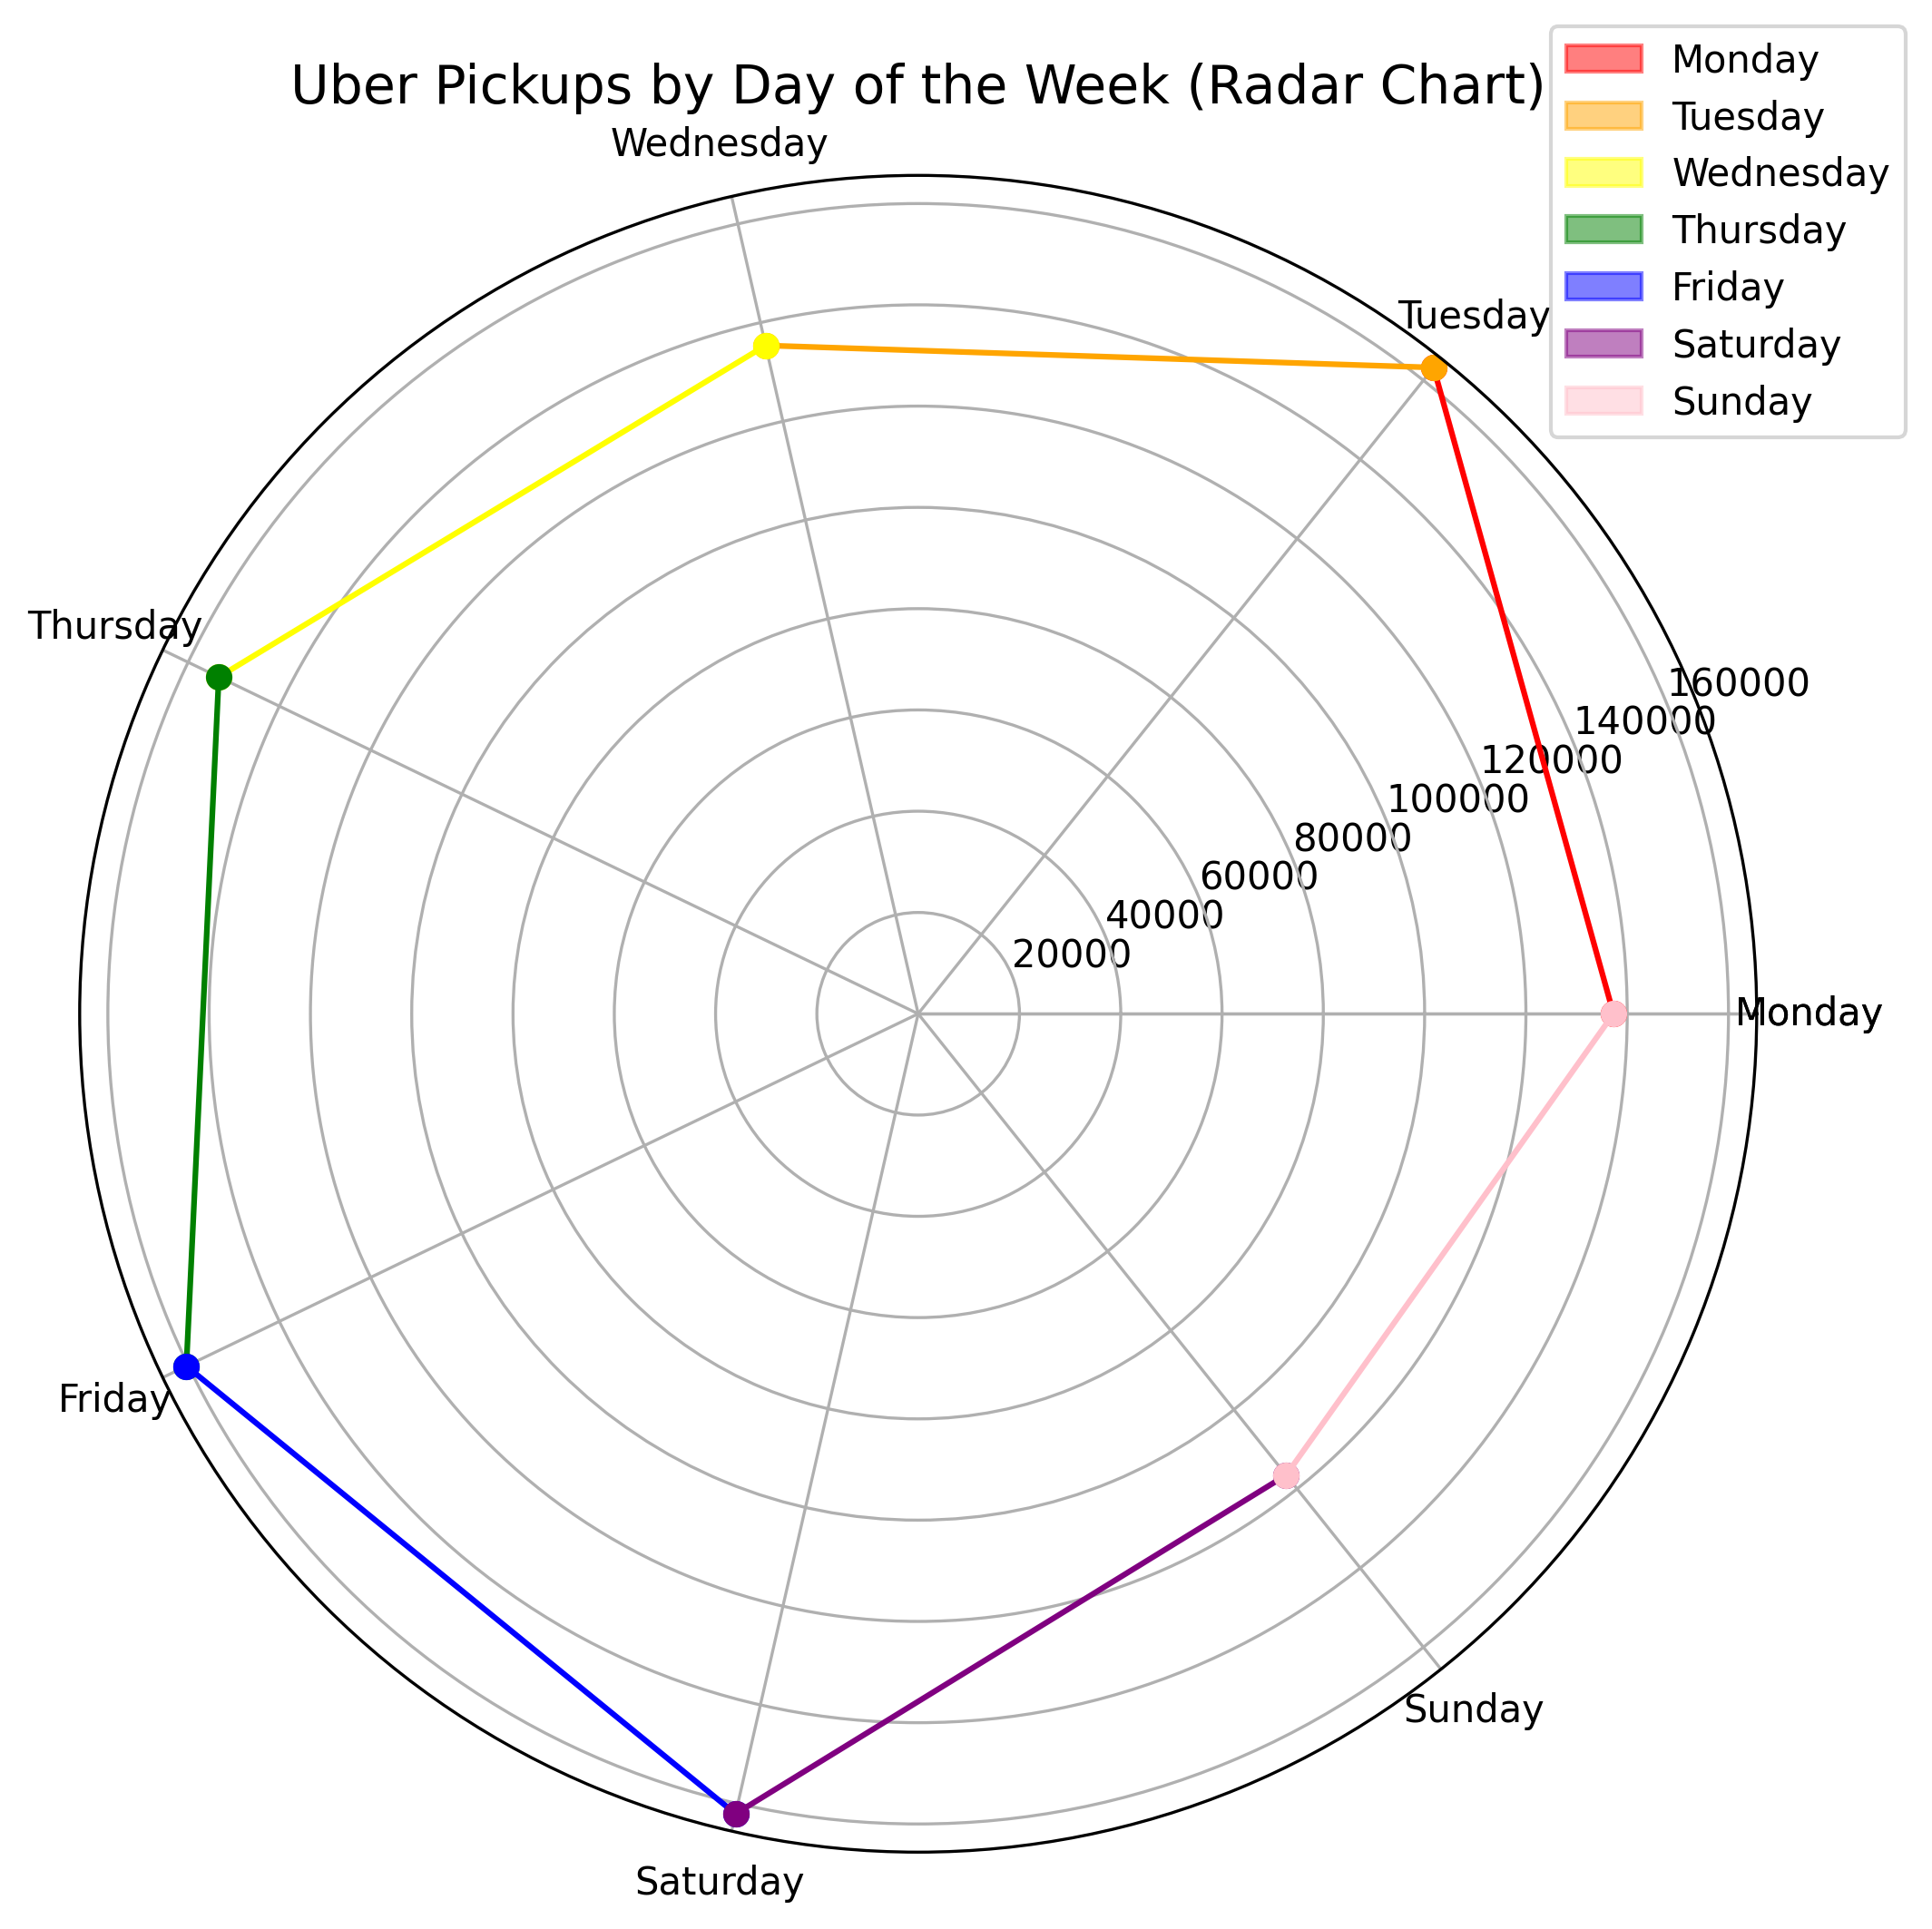

In [16]:
# 요일별 색상 설정
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']

# 방사형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# 요일별로 색상 적용
for i in range(len(categories) - 1):  # 마지막 카테고리는 반복을 닫기 위한 것이므로 제외
  ax.fill(angles[i:i+2], values[i:i+2], color=colors[i], alpha=0.5, label=categories[i])
  ax.plot(angles[i:i+2], values[i:i+2], color=colors[i], marker='o')

# 카테고리 레이블 설정
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# 제목 및 범례 추가
plt.title('Uber Pickups by Day of the Week (Radar Chart)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [17]:
df

,Lat,Lon,Base,Date,Time,hour,day_of_week
0,40.2201,-74.0021,B02512,2014-09-01,1900-01-01 00:01:00,0,Monday
1,40.7500,-74.0027,B02512,2014-09-01,1900-01-01 00:01:00,0,Monday
2,40.7559,-73.9864,B02512,2014-09-01,1900-01-01 00:03:00,0,Monday
3,40.7450,-73.9889,B02512,2014-09-01,1900-01-01 00:06:00,0,Monday
4,40.8145,-73.9444,B02512,2014-09-01,1900-01-01 00:11:00,0,Monday
...,...,...,...,...,...,...,...
1028131,40.7668,-73.9845,B02764,2014-09-30,1900-01-01 22:57:00,22,Tuesday
1028132,40.6911,-74.1773,B02764,2014-09-30,1900-01-01 22:57:00,22,Tuesday
1028133,40.8519,-73.9319,B02764,2014-09-30,1900-01-01 22:58:00,22,Tuesday
1028134,40.7081,-74.0066,B02764,2014-09-30,1900-01-01 22:58:00,22,Tuesday


In [19]:
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/fivethirtyeight/uber-pickups-in-new-york-city/versions/2/uber-raw-data-sep14.csv")

# 데이터 샘플 확인
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [20]:
# 시간 Date/Time 컬럼을 datetime 형식으로 변환
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df["hour"] = df["Date/Time"].dt.hour # hour 컬럼 생성
df["day_of_week"] = df["Date/Time"].dt.day_name() # 요일을 영어로 변환

In [ ]:
# 요일별 시간대별 탑승 수 집계 후 피봇 테이블 생성
pivot = df.pivot_table(index="day_of_week", columns="hour", values="Date/Time", aggfunc="count")
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_avg = df["day_of_week"].value_counts().reindex(ordered_days)
values = day_avg.values         # 요일별 탑승 수 리스트
labels = day_avg.index.tolist() # 요일 이름 리스트

In [24]:
values

array([137288, 163230, 135373, 153276, 160380, 162057, 116532],
      dtype=int64)

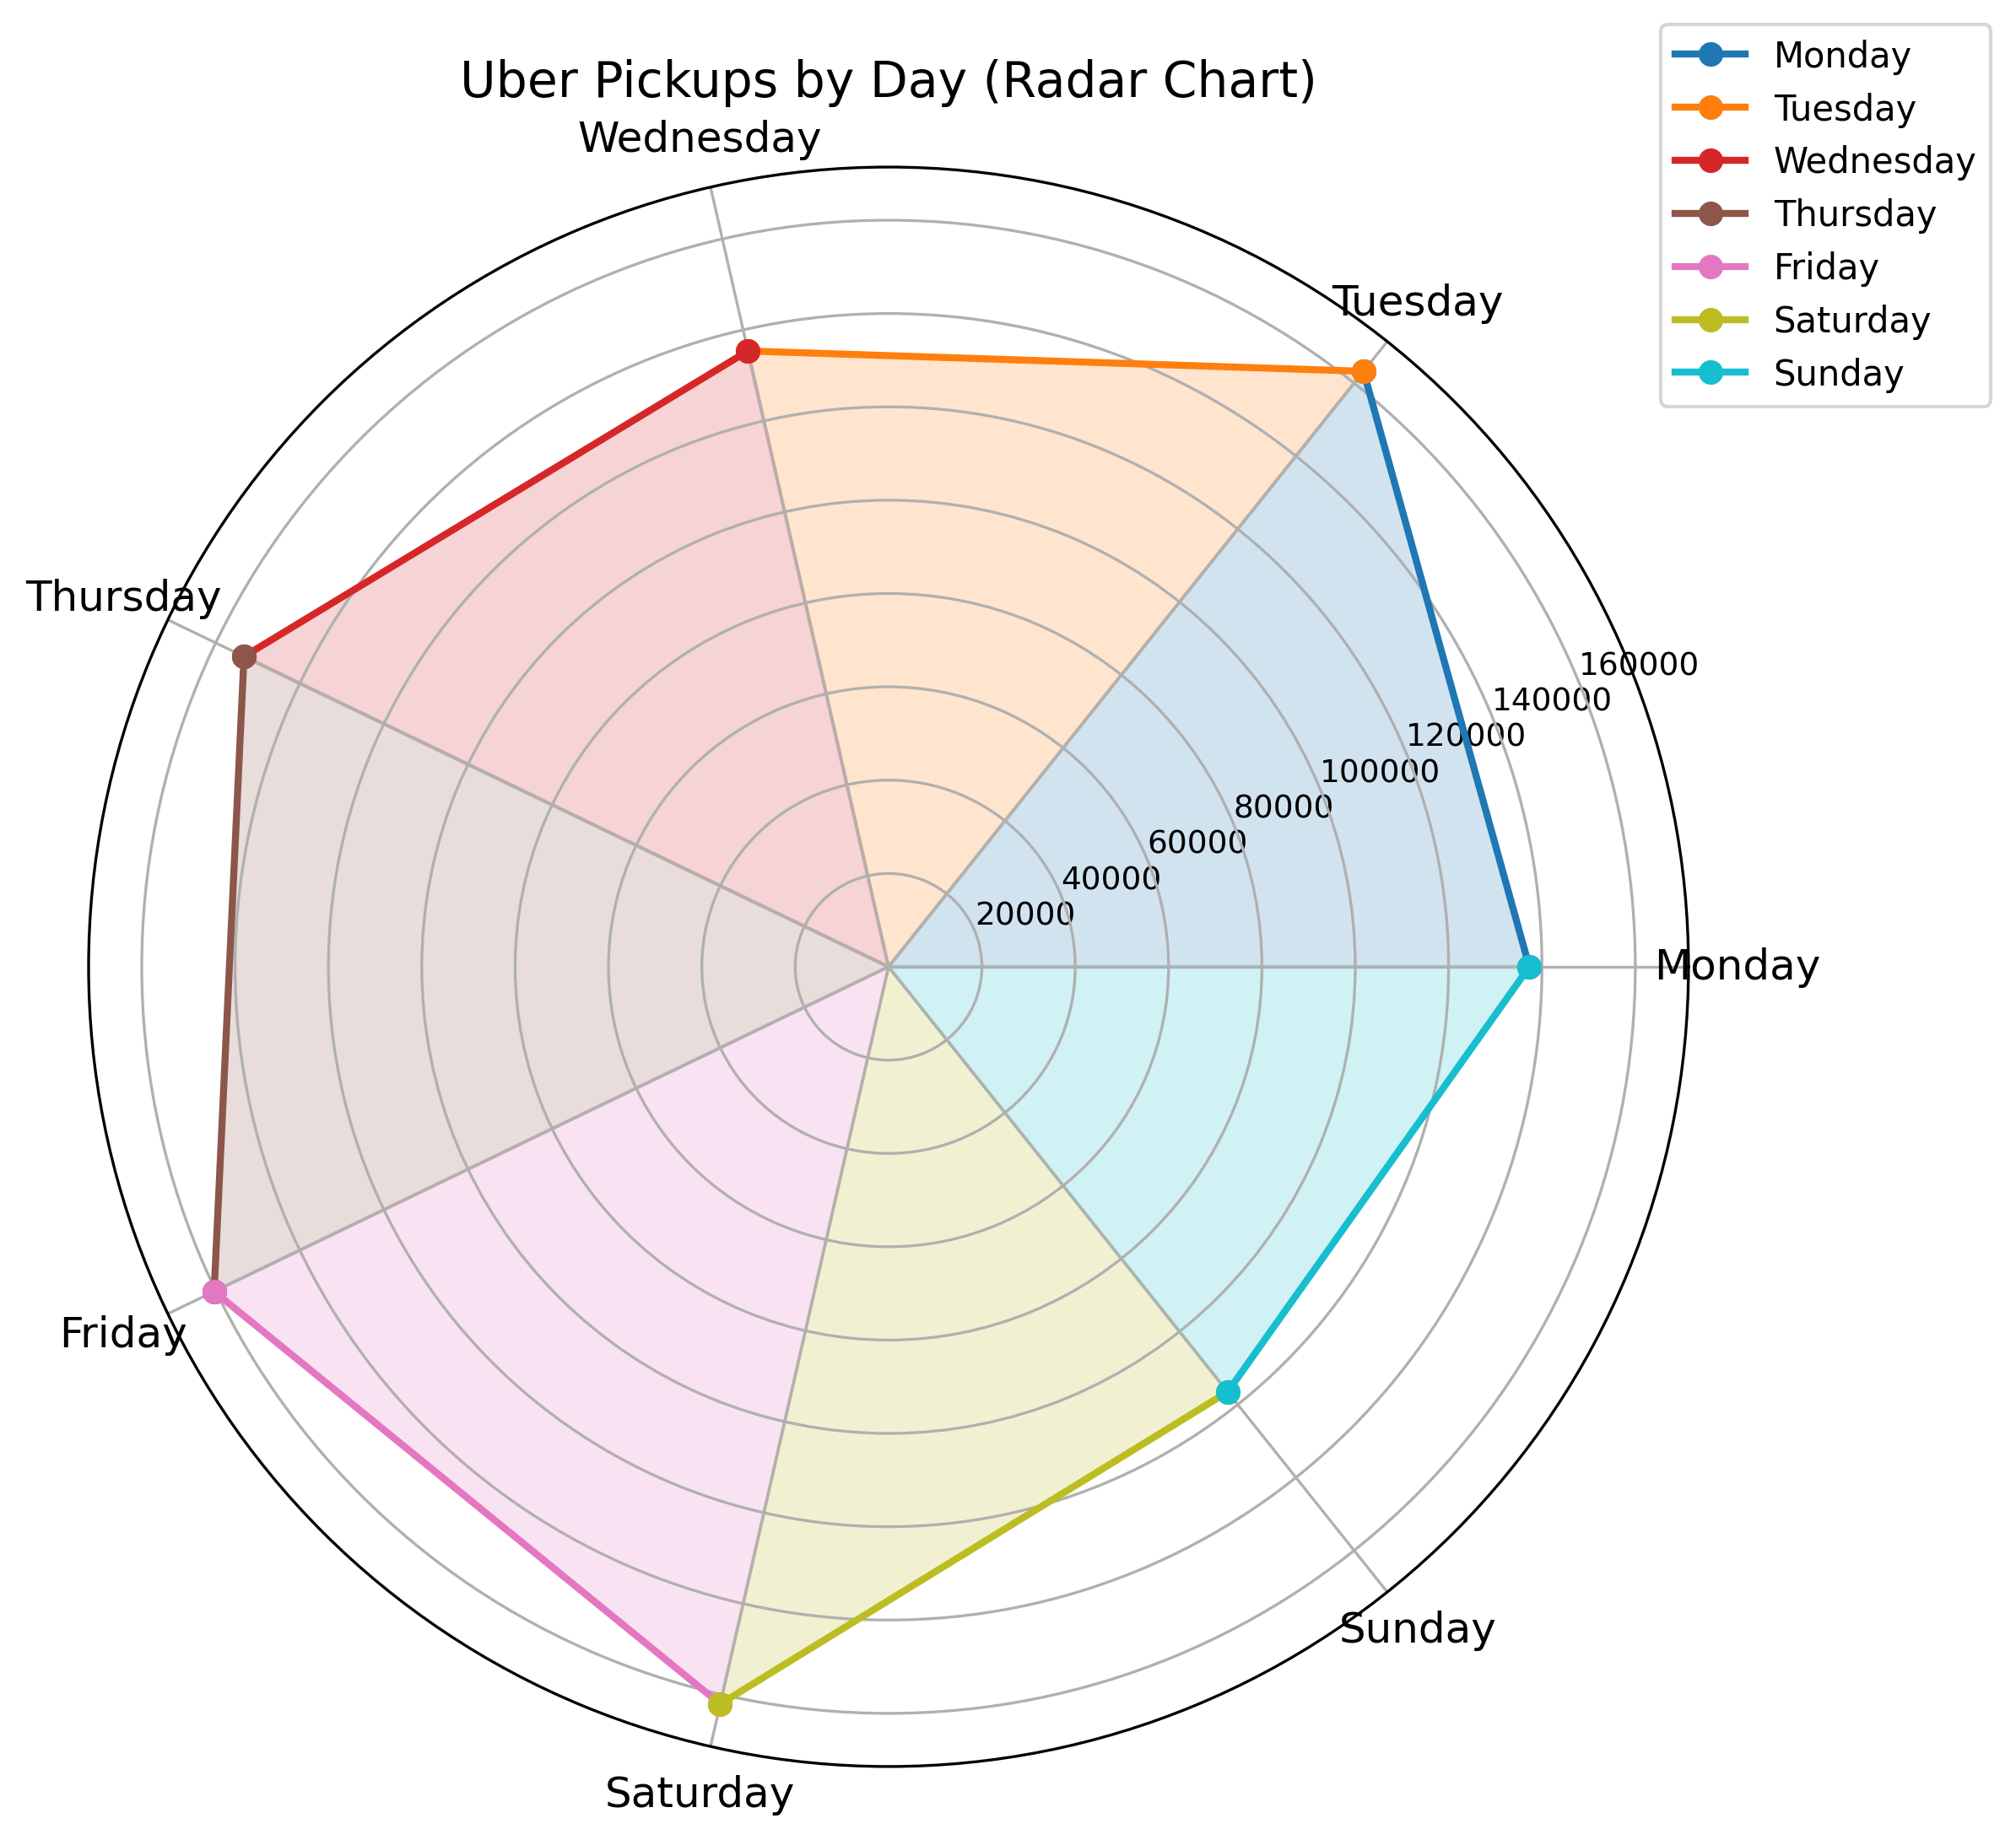

In [ ]:
# 4-2. 비교 시각화 확장: 방사형 차트 (요일별 비교)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += [angles[0]]
colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(8, 8))
for i in range(len(labels)):
    ax.plot([angles[i], angles[i+1]], [values[i], values[i+1]], marker='o', color=colors[i], linewidth=2, label=labels[i])
    ax.fill([angles[i], angles[i+1], angles[i+1], angles[i]], [0, 0, values[i+1], values[i]], color=colors[i], alpha=0.2)

ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12)
ax.tick_params(axis='y', labelsize=9)
for label in ax.get_yaxis().get_ticklabels():
    label.set_rotation(0)  # 반지름 축 텍스트를 수평으로 설정
    label.set_fontsize(9)  # 글자 크기 축소
plt.title("Uber Pickups by Day (Radar Chart)", fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

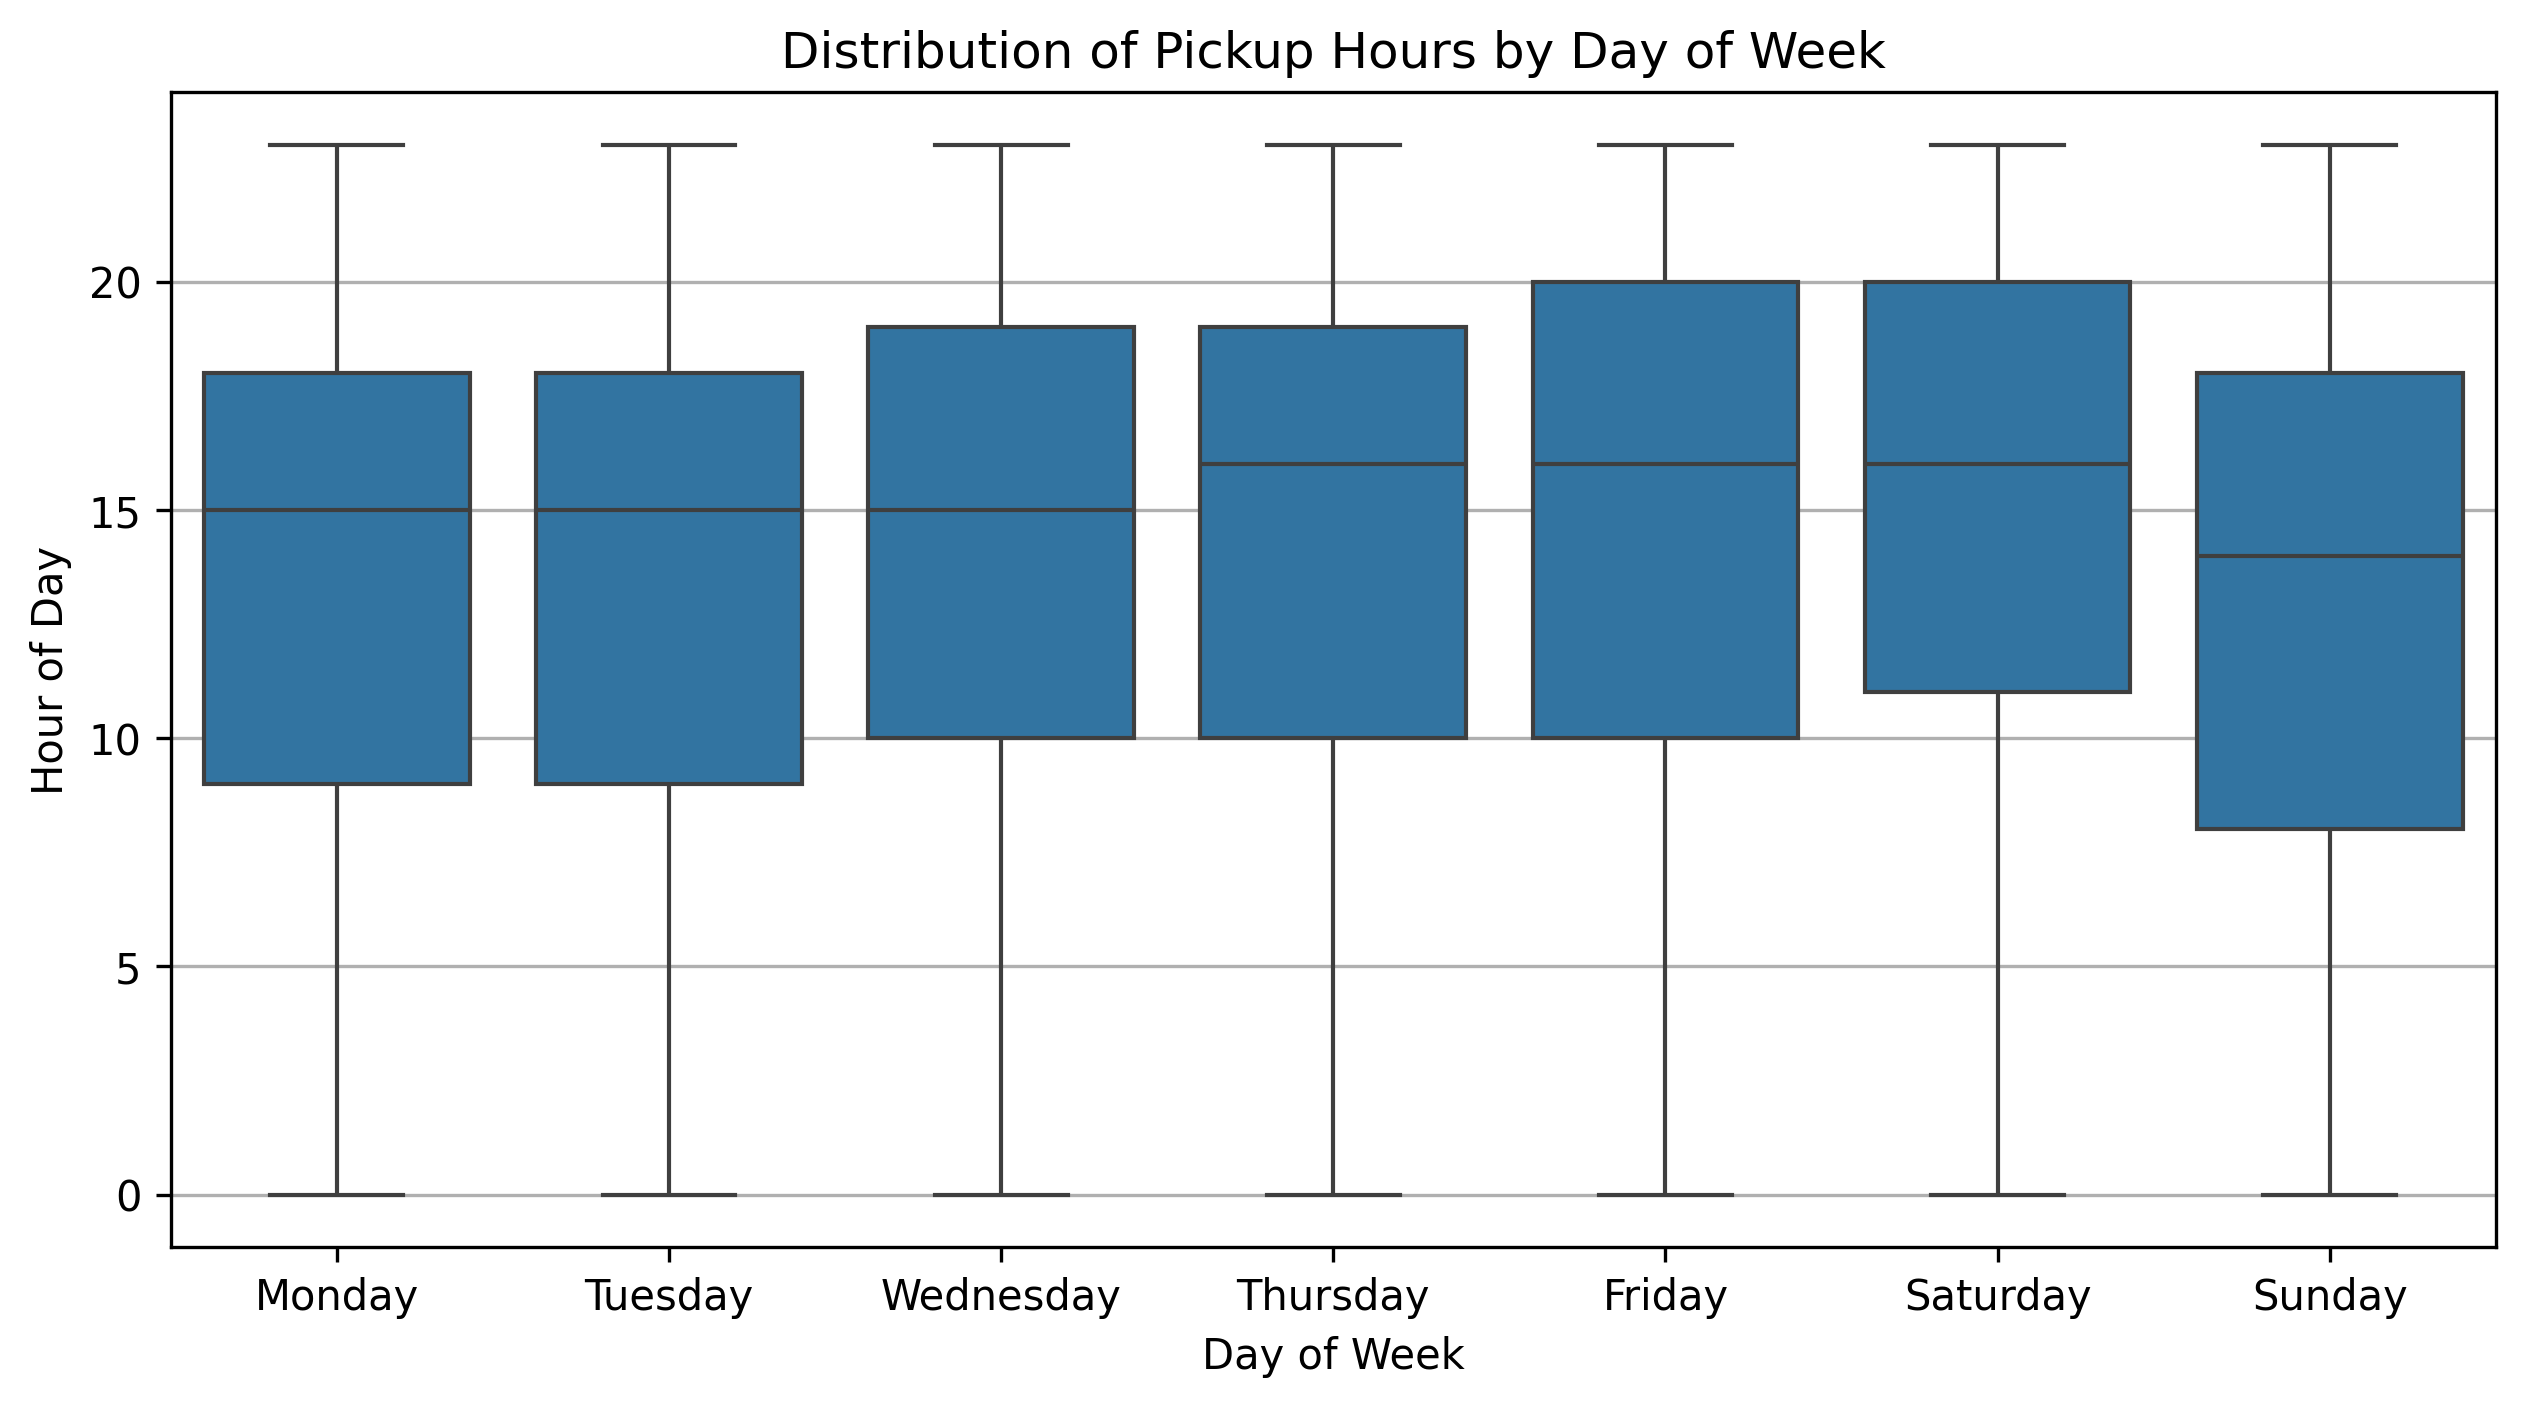

In [27]:
# 8. 비교 시각화 확장: 박스플롯 (요일별 분포)
plt.figure(figsize=(10, 5))
sns.boxplot(x="day_of_week", y="hour", data=df, order=ordered_days) # order 파라미터로 요일 순서 지정
plt.title("Distribution of Pickup Hours by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.grid(axis='y')
plt.show()